<a href="https://colab.research.google.com/github/rodnm/insta_web-scraping/blob/main/insta_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testeo de web scraping de `economicaperu`

## `instaloader`

In [1]:
!pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.11-py3-none-any.whl size=65967 sha256=ab05ae2f764ad08d74204fef87e074ca56c404a36a8478b78ce6d5d981ca047e
  Stored in directory: /root/.cache/pip/wheels/59/74/a0/a643055404b7f51b588926301ce74f4ad195e5d45cde82e79d
Successfully built instaloader


### Librerías

In [2]:
import instaloader
import pandas as pd
import re
import os
import shutil

### Extracción de datos de perfil de `economicaperu`

Siguiendo la guía y ejemplo de la publicación de [Make Use Of (2022)](https://www.makeuseof.com/python-instagram-fetch-data/), extraemos datos generales del perfil de `economicaperu` usando la librería [Instaloader](https://instaloader.github.io/as-module.html).

In [3]:
USER = 'economicaperu'

# Creando una instancia de la clase Instaloader
bot = instaloader.Instaloader()

# Cargando un perfil desde un identificador de Instagram
profile = instaloader.Profile.from_username(bot.context, USER)
print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)

# emails de bio si existen
emails = re.findall(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", profile.biography)
print("Emails extracted from the bio:")
print(emails)

Username:  economicaperu
User ID:  7228077074
Number of Posts:  2028
Followers Count:  15013
Following Count:  123
Bio:  Organización de estudiantes de Economía de la PUCP
External URL:  https://linktr.ee/economicaperu
Emails extracted from the bio:
[]


Si previamente existe la carpeta de `USER` con los archivos que vamos a descargar (debido a volver a que estamos corriendo el código nuevamente) mejor los eliminarlos para evitar errores.

In [4]:
carpeta = USER

# Verificar si la carpeta existe
if os.path.exists(carpeta) and os.path.isdir(carpeta):
    # Iterar sobre cada archivo en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".txt") or archivo.endswith(".json") or archivo.endswith(".json.xz") or archivo.endswith(".jpg"):
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(carpeta, archivo)
            # Eliminar el archivo
            os.remove(ruta_completa)

    # Eliminar la carpeta misma
    shutil.rmtree(carpeta)

    print("Carpeta y archivos eliminados exitosamente.")
else:
    print("La carpeta no existe. No se realizaron cambios.")


La carpeta no existe. No se realizaron cambios.


Esta linea de código se ejecuta en la terminal y descarga la metadata `(fecha, likes, comentarios y descripción)` de cada post en archivos `.txt`,`.json` y `.json.xz`, además, descarga la foto de perfil de la cuenta en `.jpg`.

El problema de ejecutar esta linea de código es que es al ser muchos post eso es detectado por la API de Instagram como actividad sospechosa y genera el error `Fatal error: 400 Bad Request` o `JSON Query to graphql/query: HTTP error code 401`.

La única manera de evitar algún problema es corriendo esto en la terminal de la PC (sea Windows, Mac o UNIX/Linux) y parar al ver alguno de estos errores. Después de una hora mínimo, repetir la ejecución del código y volver a parar si aparece algún error. Y así repetir hasta conseguir todos los archivos con la metadata de cada post.

In [6]:
!instaloader --no-pictures --no-videos --post-metadata-txt "{date_utc}|{likes}|{comments}|{caption}" --comments economicaperu

Hint: Use --login to download higher-quality versions of pictures.
[1/1] Downloading profile economicaperu
economicaperu/2021-06-08_14-41-41_UTC_profile_pic.jpg already exists
Retrieving posts from profile economicaperu.
[   1/2028] [2024-04-11_14-06-12|104|10|🎉 …] updated [2024-04-11_14-06-12|105|10|🎉 …] JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
Download <Post C5n7eT9LKAW> of economicaperu: JSON Query to graphql/query: HTTP error code 401.
[   2/2028] [2024-05-29_22-50-17|104|0|📰Co…] json 
[   3/2028] [2024-05-28_22-48-08|54|0|#Eco…] json 
[   4/2028] [2024-05-26_01-13-12|76|0|El d…] updated [2024-05-26_01-13-12|84|0|El d…] json 
[   5/2028] [2024-05-24_14-58-36|412|14|🌟 …] updated [2024-05-24_14-58-36|414|14|🌟 …] JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
JSON Query to graphql/query: HTTP error code 401. [retrying; skip with ^C]
Download <Post C7

Debido a esta dificultad ya tengo un archivo .zip que he podido generar en mi PC donde ya concluí ese bucle de ejecutar esa línea de código. Es este archivo comprimido se encuentra los datos de 2057 posts.

El motivo por el que es mayor al número de post de 2026 que previamente revisamos con Instaloader lo desconozco. Sospecho que puede haber incluido información de posts que previamente fueron eliminados, pero que sigue almacenado sus metadatos en los servidores de Facebook.

In [5]:
import zipfile

# Ruta del archivo ZIP y el directorio de destino
zip_file_path = 'economicaperu.zip'
output_dir = './'

# Asegurarse de que el directorio de destino exista
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Abrir y extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Archivo descomprimido en: {output_dir}")


Archivo descomprimido en: ./


Esta celda de código se encarga de eliminar cualquier hashtags  que pueda aparecer entre las fechas si ocurriece.

Después se encarga de detectar todos los archivos txt de la carpeta `economicaperu`, detecta cada nuevo registro y aplana el todos los datos de cada archivo (caption con varios saltos de línea) y los agrupa en una lista `datos`.

In [7]:
# Función para eliminar hashtags de una cadena
def eliminar_hashtags(cadena):
    return re.sub(r'#\w+\s*', '', cadena)

# Ruta de la carpeta que contiene los archivos txt
carpeta = USER

# Lista para almacenar los datos de cada archivo
datos = []

# Expresión regular para detectar la fecha al inicio de una línea
patron_fecha = re.compile(r'^\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}')

# Iterar sobre cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".txt"):
        with open(os.path.join(carpeta, archivo), "r", encoding="utf-8") as f:
            lineas = f.readlines()

            # Variables para agrupar datos
            registro_actual = []
            for linea in lineas:
                linea = linea.strip()
                if patron_fecha.match(linea):
                    if registro_actual:
                        # Unir el caption y agregar el registro a los datos
                        if len(registro_actual) == 4:
                            datos.append(registro_actual)
                    # Iniciar un nuevo registro
                    partes = linea.split("|", 3)
                    if len(partes) == 4:
                        registro_actual = partes
                        registro_actual[3] = [registro_actual[3]]  # Convertir caption en lista
                    else:
                        registro_actual = []
                else:
                    if registro_actual:
                        registro_actual[3].append(linea)

            # Agregar el último registro
            if registro_actual and len(registro_actual) == 4:
                datos.append(registro_actual)

# Aplanar los captions
for registro in datos:
    registro[3] = " ".join(registro[3])

Se transforma la lista `datos` en un `dataframe` y se guarda como un archivo `.csv`.

In [12]:
# Crear un DataFrame con los datos
df = pd.DataFrame(datos, columns=["fecha", "likes", "comments", "caption"])

# Convertir columnas "likes" y "comments" a tipo numérico
df["likes"] = pd.to_numeric(df["likes"], errors='coerce')
df["comments"] = pd.to_numeric(df["comments"], errors='coerce')

# Eliminar filas con valores NaN en la columna "likes"
df = df.dropna(subset=["likes"])

# Convertir la columna "fecha" a tipo datetime con el formato adecuado y establecerla en UTC
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d_%H-%M-%S", errors='coerce', utc=True)

# Eliminar filas con valores NaN en la columna "fecha"
df = df.dropna(subset=["fecha"])

# Convertir la columna "fecha" a UTC-5
df["fecha"] = df["fecha"].dt.tz_convert("Etc/GMT+5")

# Ordenar el DataFrame por la columna "fecha" y luego por "likes" de manera descendente
df = df.sort_values(by=["fecha", "likes"], ascending=[True, False])

# Eliminar duplicados, quedándose con la fila con más likes para cada fecha
df = df.drop_duplicates(subset="fecha", keep="first")

# Ordenar el DataFrame por la columna "fecha" de manera descendente
df = df.sort_values(by="fecha", ascending=True)

# Reiniciar el índice del DataFrame
df.reset_index(drop=True, inplace=True)

# Guardar el DataFrame como un archivo CSV
file_name = f"datos_{USER}.csv"
df.to_csv(file_name, index=False)
print(f"DataFrame guardado como {file_name}")
print("")
print(df.shape)
print("")

# Mostrar el DataFrame
print(df.head(10))


DataFrame guardado como datos_economicaperu.csv

(2028, 4)

                      fecha  likes  comments  \
0 2018-03-13 15:12:34-05:00     21         0   
1 2018-03-14 00:48:54-05:00     24         0   
2 2018-03-14 18:32:05-05:00     17         2   
3 2018-03-15 11:08:12-05:00     14         2   
4 2018-03-15 15:44:48-05:00     16         0   
5 2018-03-16 18:35:33-05:00     16         0   
6 2018-03-18 21:29:00-05:00     25         0   
7 2018-03-18 23:31:17-05:00      6         0   
8 2018-03-20 10:56:53-05:00     14         0   
9 2018-03-20 12:30:26-05:00     22         0   

                                             caption  
0  No te pierdas nuestros  cursos de Stata Nivel ...  
1  "El dinero puede servir para liberar al indivi...  
2  No te pierdas la oportunidad de ser parte de n...  
3  La Organización Económica y el Centro de Estud...  
4  Proyecto de ley de la comisión de trabajo ampl...  
5  Perú se encuentra entre los países con mayor c...  
6  8% de desempleo en Lima

In [14]:
df

,fecha,likes,comments,caption
0,2018-03-13 15:12:34-05:00,21,0,No te pierdas nuestros cursos de Stata Nivel ...
1,2018-03-14 00:48:54-05:00,24,0,"""El dinero puede servir para liberar al indivi..."
2,2018-03-14 18:32:05-05:00,17,2,No te pierdas la oportunidad de ser parte de n...
3,2018-03-15 11:08:12-05:00,14,2,La Organización Económica y el Centro de Estud...
4,2018-03-15 15:44:48-05:00,16,0,Proyecto de ley de la comisión de trabajo ampl...
...,...,...,...,...
2023,2024-05-23 18:25:43-05:00,305,5,¿Sabías que las promociones de Yape están camb...
2024,2024-05-24 09:58:36-05:00,414,14,🌟 De Guardianes a Engreídos del Hogar 🌟 Nuest...
2025,2024-05-25 20:13:12-05:00,84,0,El debate sobre la implementación de “robots m...
2026,2024-05-28 17:48:08-05:00,54,0,#Ecomundo “Explorando la solidez económica de ...


from matplotlib import pyplot as plt
df['likes'].plot(kind='hist', bins=20, title='likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['comments'].plot(kind='hist', bins=20, title='comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='likes', y='comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha']
  ys = series['likes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('likes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha']
  ys = series['comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('comments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['fecha']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'fecha'}, axis=1)
              .sort_values('fecha', ascending=True))
  xs = counted['fecha']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['likes'].plot(kind='line', figsize=(8, 4), title='likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['comments'].plot(kind='line', figsize=(8, 4), title='comments')
plt.gca().spines[['top', 'right']].set_visible(False)

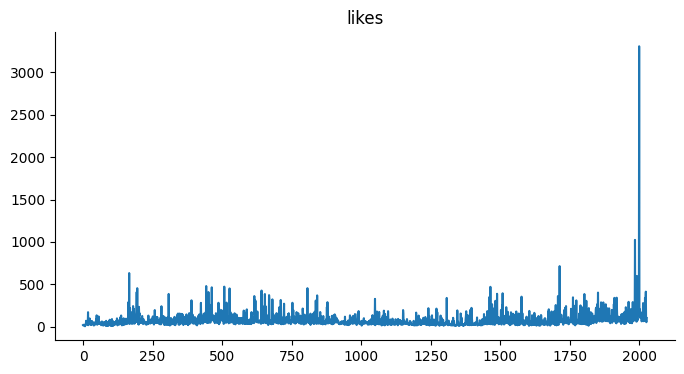

In [17]:
from matplotlib import pyplot as plt
df['likes'].plot(kind='line', figsize=(8, 4), title='likes')
plt.gca().spines[['top', 'right']].set_visible(False)

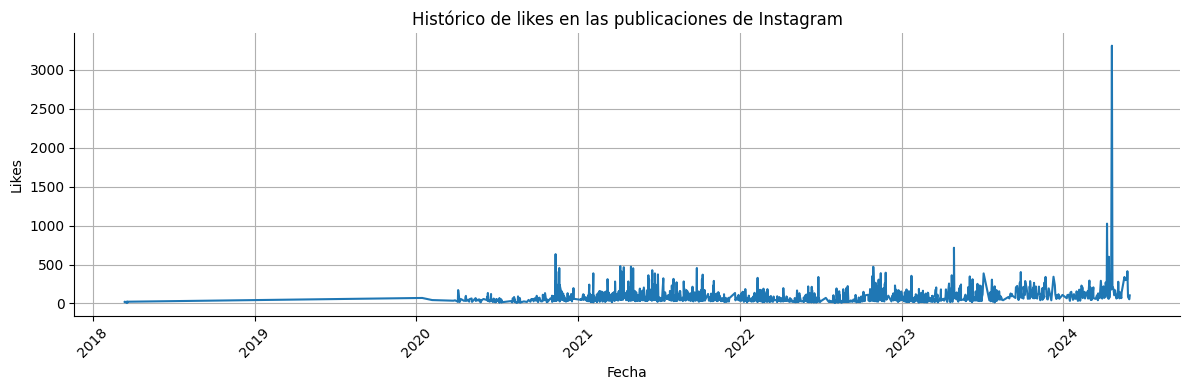

In [26]:
# Crear un gráfico de serie de tiempo (fecha vs likes)
plt.figure(figsize=(12, 4))
plt.plot(df['fecha'], df['likes'])
#plt.plot(df['fecha'], df['likes'], marker='o', linestyle='-')
plt.title('Histórico de likes en las publicaciones de Instagram')
plt.xlabel('Fecha')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar spines
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()